## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

#from google.colab import drive  
#drive.mount('/content/drive/')

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [1]:
#project_path = "/content/drive/My Drive/Project - 7/DogBreed_Classification-20200321T131046Z-001/DogBreed_Classification/"

project_path = "D:\\Nisha\\Machine Learning\\GL\\Projects\\Project - 7\\DogBreed_Classification-20200321T131046Z-001\\DogBreed_Classification\\"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [2]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [3]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [4]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [5]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

In [2]:
import pandas as pd

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [3]:
doglabels = pd.read_csv('labels.csv')

In [4]:
doglabels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [5]:
doglabels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

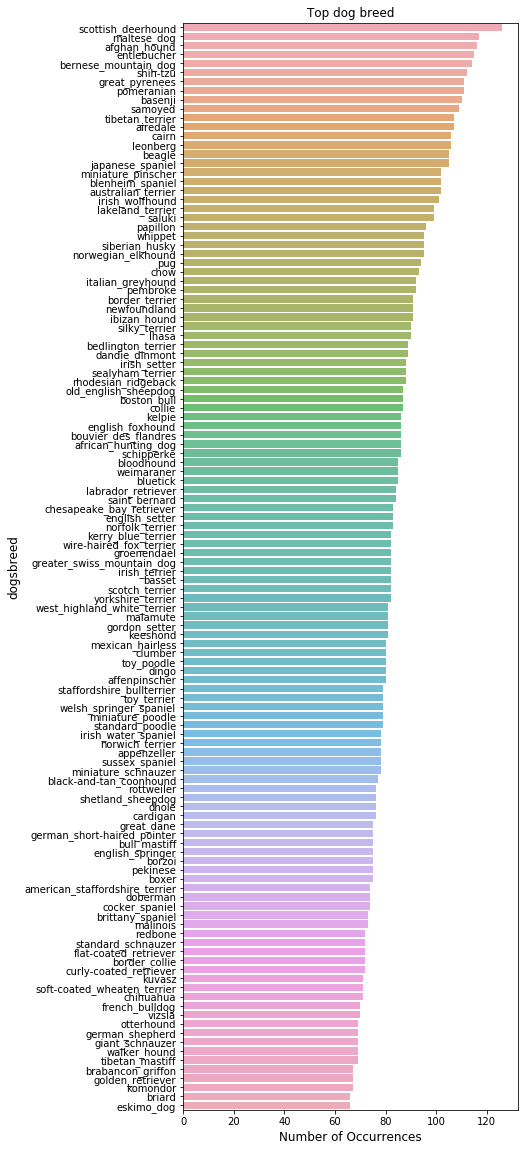

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
dogbreed = doglabels['breed'].value_counts()
Top_dogbreed = dogbreed[:,]
plt.figure(figsize=(6,20))
sns.barplot(Top_dogbreed.values, Top_dogbreed.index,alpha=0.8)
plt.title('Top dog breed')
plt.ylabel('dogsbreed', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

In [10]:
doglabels['breed'].nunique()

120

### Get one-hot encodings of labels

In [7]:
import tensorflow.keras

In [8]:
dogLabels = pd.get_dummies(doglabels['breed'])

In [9]:
dogLabels.shape

(10222, 120)

In [10]:
dogLabels.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [11]:
img_rows = 128
img_cols = 128

In [12]:
x_train = []
y_train = []
loc = []

from tqdm import tqdm
import cv2
for i, img in tqdm(doglabels.values):
  train_image = cv2.imread('./train/{}.jpg'.format(i),3)
  loc.append('./train/'+ i + '.jpg')
  tr_img_resize = cv2.resize(train_image,(img_rows,img_cols))
  x_train.append(tr_img_resize)
  y_train.append(img)

100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [02:42<00:00, 63.02it/s]


dingo
pekinese
bluetick


<function matplotlib.pyplot.show(*args, **kw)>

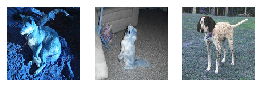

In [13]:
import matplotlib.pyplot as plt
for i in range(1,4):
  plt.subplot(1,4,i)
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.axis('off')
plt.show

norfolk_terrier


'./train/0075dc49dab4024d12fafe67074d8a81.jpg'

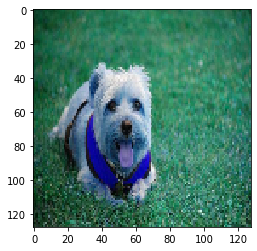

In [14]:
i = 14
plt.imshow(x_train[i])
print(y_train[i])
loc[i]

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [16]:
type(x_train)

list

In [15]:
import numpy as np
x_train_data = np.array(x_train)
y_train_data = np.array(y_train)


In [17]:
x_train_data.shape,y_train_data.shape

((10222, 128, 128, 3), (10222,))

In [18]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [19]:
y_train_data = pd.get_dummies(y_train_data)

In [20]:
y_train_data.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval = train_test_split(x_train_data,y_train_data, test_size = 0.20)
Xtrain.shape,Xval.shape,ytrain.shape,yval.shape

((8177, 128, 128, 3), (2045, 128, 128, 3), (8177, 120), (2045, 120))

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [22]:
test_img = pd.read_csv("sample_submission.csv",usecols = [0])
test_img.head(2)

,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890


In [23]:
test_img.shape

(10357, 1)

Run the below code to load the test image files in x_test_feature

In [24]:
x_test_feature = []
#i = 0 # initialisation
for i in tqdm(test_img['id']): # f for format ,jpg    
    img = cv2.imread('./test/{}.jpg'.format(i), 1)  
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|████████████████████████████████████████████████████████████████████████████| 10357/10357 [01:50<00:00, 93.81it/s]


Normalize the test data and convert it into 4 dimensions

In [25]:
x_test_data = np.array(x_test_feature).astype("float32")

In [26]:
x_test_data /= 255

In [27]:
x_test_data.shape

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.layers import Convolution2D
 

In [33]:
CnnModel1 = Sequential()
# 1st Conv Layer
CnnModel1.add(Convolution2D(1024, 5, 5, input_shape=(128, 128, 3)))  #136
CnnModel1.add(Activation('relu'))
# 2nd Conv Layer
CnnModel1.add(Convolution2D(1000, 3, 3))
CnnModel1.add(Activation('relu'))
#Dense layer
CnnModel1.add(Flatten())
CnnModel1.add(Dense(256))
CnnModel1.add(Activation('relu'))
#final layer
CnnModel1.add(Dense(120))
CnnModel1.add(Activation('softmax'))
CnnModel1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 1024)      77824     
_________________________________________________________________
activation_4 (Activation)    (None, 25, 25, 1024)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 1000)        9217000   
_________________________________________________________________
activation_5 (Activation)    (None, 8, 8, 1000)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16384256  
_________________________________________________________________
activation_6 (Activation)    (None, 256)              

### Use batch_size = 128 and epochs = 10 and execute the model

In [34]:
# Loss and Optimizer
CnnModel1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Store Training Results
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]
   

In [35]:
batch_size = 128
epochs = 10
# Train the model
CnnModel1.fit(Xtrain, ytrain, epochs=epochs, batch_size=batch_size,
              validation_data=(Xval, yval), callbacks=callback_list, verbose=True, workers = 6)
loss_and_metrics = CnnModel1.evaluate(Xval, yval)
print(loss_and_metrics)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 93s 11ms/sample - loss: 24.0587 - accuracy: 0.0084 - val_loss: 4.7763 - val_accuracy: 0.0112
Epoch 2/10
8177/8177 [==============================] - 81s 10ms/sample - loss: 4.7552 - accuracy: 0.0135 - val_loss: 4.7408 - val_accuracy: 0.0200
Epoch 3/10
8177/8177 [==============================] - 82s 10ms/sample - loss: 4.6913 - accuracy: 0.0166 - val_loss: 4.6815 - val_accuracy: 0.0186
Epoch 4/10
8177/8177 [==============================] - 82s 10ms/sample - loss: 4.6306 - accuracy: 0.0205 - val_loss: 4.6411 - val_accuracy: 0.0200
Epoch 5/10
8177/8177 [==============================] - 82s 10ms/sample - loss: 4.5842 - accuracy: 0.0226 - val_loss: 4.6218 - val_accuracy: 0.0181
Epoch 6/10
8177/8177 [==============================] - 81s 10ms/sample - loss: 4.5452 - accuracy: 0.0243 - val_loss: 4.6145 - val_accuracy: 0.0259
Epoch 7/10
8177/8177 [==============================] - 81s 10m

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [48]:
# This will do preprocessing and realtime data augmentation:
train_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [49]:
# This will do preprocessing and realtime data augmentation:
val_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [50]:
CnnModel1.fit_generator(train_generator.flow(Xtrain, ytrain,batch_size=32),
                    epochs=10,
                    validation_data=val_generator.flow(Xval, yval,batch_size=32), callbacks=callback_list,
                    workers = 6
                       )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 256 steps, validate for 64 steps
Epoch 1/10
256/256 [==============================] - 37s 144ms/step - loss: 4.5198 - accuracy: 0.0294 - val_loss: 4.5356 - val_accuracy: 0.0289
Epoch 2/10
256/256 [==============================] - 37s 145ms/step - loss: 4.5045 - accuracy: 0.0279 - val_loss: 4.5100 - val_accuracy: 0.0269
Epoch 3/10
256/256 [==============================] - 37s 145ms/step - loss: 4.4961 - accuracy: 0.0324 - val_loss: 4.5464 - val_accuracy: 0.0347
Epoch 4/10
256/256 [==============================] - 38s 147ms/step - loss: 4.4940 - accuracy: 0.0316 - val_loss: 4.5257 - val_accuracy: 0.0313
Epoch 5/10
256/256 [==============================] - 38s 147ms/step - loss: 4.4945 - accuracy: 0.0286 - val_loss: 4.5112 - val_accuracy: 0.0303
Epoch 6/10
256/256 [==============================] - 38s 148ms/step - loss: 4.4782 - accuracy: 0.0339 - val_loss: 4.5391 - val_accuracy: 0.0372
Epoch 7/10
256/256 [=================

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [40]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
#base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
base_model= VGG16(weights=('./'+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg',input_shape = (128, 128, 3))

Print the summary of the base_model

In [41]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [42]:
#Adding custom Layers 
Model1 = base_model.output
#Dense layer
Model2 = Flatten()(Model1)
Model2 = Dense(1024,activation = 'relu')(Model2)
Model2 = Dense(256,activation = 'relu')(Model2)
pred = Dense(120,activation = 'softmax')(Model2)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [43]:
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [44]:
# creating the final model 
Tran_Model1 = Model(base_model.input,pred)  

In [45]:
Tran_Model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [47]:
batch_size = 128
epochs = 10

# Loss and Optimizer
Tran_Model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
Tran_Model1.fit(Xtrain, ytrain, epochs=epochs, batch_size=batch_size,
              validation_data=(Xval, yval), callbacks=callback_list, verbose=True,workers = 6)

loss_and_metrics = Tran_Model1.evaluate(Xval, yval)
print(loss_and_metrics)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 169s 21ms/sample - loss: 5.6623 - accuracy: 0.0499 - val_loss: 4.2577 - val_accuracy: 0.0763
Epoch 2/10
8177/8177 [==============================] - 75s 9ms/sample - loss: 3.5365 - accuracy: 0.1963 - val_loss: 3.1920 - val_accuracy: 0.2440
Epoch 3/10
8177/8177 [==============================] - 37s 5ms/sample - loss: 2.4038 - accuracy: 0.3949 - val_loss: 2.8475 - val_accuracy: 0.3218
Epoch 4/10
8177/8177 [==============================] - 37s 5ms/sample - loss: 1.7671 - accuracy: 0.5215 - val_loss: 2.5902 - val_accuracy: 0.3760
Epoch 5/10
8177/8177 [==============================] - 37s 5ms/sample - loss: 1.3010 - accuracy: 0.6381 - val_loss: 2.5507 - val_accuracy: 0.3819
Epoch 6/10
8177/8177 [==============================] - 37s 5ms/sample - loss: 0.9485 - accuracy: 0.7398 - val_loss: 2.6735 - val_accuracy: 0.3863
Epoch 7/10
8177/8177 [==============================] - 37s 5ms/samp

Conclusion:

Trained with multiple hyper parameters like batch size, increasing epochs,batchnormalization, changing optimizers to RMProps, Adammax etc.. 
Still the accurracy was very less.  
Due to the highly imbalanced dataset (shown in a graph), the training and validation accuracy is not higher and training gets in to overfitting zone. 
We can try elbow method and PCA techniques and SMOTE- however, i haven't tried it out due to time constraint in running the dataset. 


In [51]:
#Other Parameter tuning examples tried out. 
#Used Adamax with lower learning rate and less batch size for training

opt = tensorflow.keras.optimizers.Adamax(lr = 0.0001)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# creating the final model 
Tran_Model2 = Model(base_model.input,pred)

# Loss and Optimizer
Tran_Model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


TranModel2hist = Tran_Model2.fit_generator(train_generator.flow(Xtrain, ytrain,batch_size=10),
                    epochs=30,
                    validation_data=val_generator.flow(Xval, yval,batch_size=128), callbacks=callback_list,shuffle = True,
                    workers = 6
                         )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 818 steps, validate for 16 steps
Epoch 1/30
818/818 [==============================] - 50s 61ms/step - loss: 2.4350 - accuracy: 0.4316 - val_loss: 3.6317 - val_accuracy: 0.25921:39 - loss: 2.7493 - accuracy - ETA: 1:23 - loss: 2.6 - ETA: 41s - loss: 2.6367 - accuracy: 0.41  - ETA: 32s - loss: 2.6789 - accuracy: 0. - ETA: 32s - loss: 2.6 - ETA: 29s - lo - ETA: 25s - loss: 2.58 - ETA: 22s -  - ETA: 19s - loss: 2.5186 - accuracy: 0. - ETA: 19s - loss: 2.5155 - accura - ETA: 17s - loss - ETA: 14s  - ETA: 11s  - ETA: 0s - loss: 2.4362 - accuracy: 0.43
Epoch 2/30
818/818 [==============================] - 48s 59ms/step - loss: 2.1853 - accuracy: 0.4598 - val_loss: 3.4251 - val_accuracy: 0.2836
Epoch 3/30
818/818 [==============================] - 48s 59ms/step - loss: 2.0618 - accuracy: 0.4787 - val_loss: 3.3844 - val_accuracy: 0.2763
Epoch 4/30
818/818 [==============================] - 49s 60ms/step - loss: 2.0177 - accuracy: 0.48

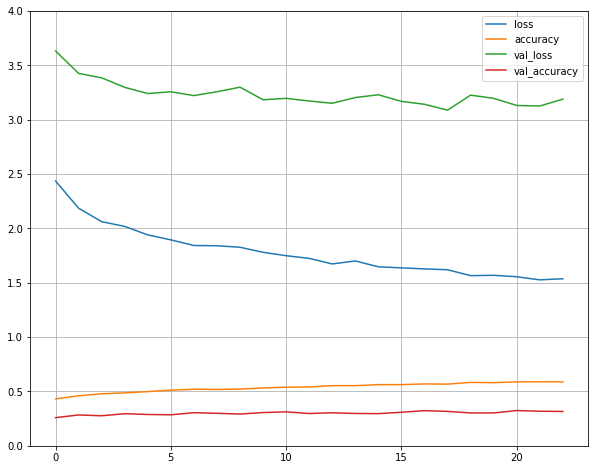

In [54]:
pd.DataFrame(TranModel2hist.history).plot(figsize = (10,8))
plt.grid(True)
plt.gca().set_ylim(0,4)
plt.show()

In [55]:
#Used SGD with lower learning rate and decay with nesterov. Increase epoch to 30. Still overfitting. 

opt = tensorflow.keras.optimizers.SGD(lr = 0.0001, decay=1e-6, momentum=0.9, nesterov=True)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# creating the final model 
Tran_Model3 = Model(base_model.input,pred)

# Loss and Optimizer
Tran_Model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


TranModel3hist = Tran_Model2.fit_generator(train_generator.flow(Xtrain, ytrain,batch_size=10),
                    epochs=30,
                    validation_data=val_generator.flow(Xval, yval,batch_size=128), callbacks=callback_list,shuffle = True,
                    workers = 6
                         )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 818 steps, validate for 16 steps
Epoch 1/30
818/818 [==============================] - 47s 58ms/step - loss: 1.5139 - accuracy: 0.5956 - val_loss: 3.1004 - val_accuracy: 0.3222ETA: 27s - loss:  - ETA: 25s - loss: 1.537 - ETA: 
Epoch 2/30
818/818 [==============================] - 48s 59ms/step - loss: 1.4754 - accuracy: 0.6030 - val_loss: 3.1822 - val_accuracy: 0.3154
Epoch 3/30
818/818 [==============================] - 48s 59ms/step - loss: 1.4761 - accuracy: 0.6034 - val_loss: 3.1925 - val_accuracy: 0.3056
Epoch 4/30
818/818 [==============================] - 49s 60ms/step - loss: 1.4528 - accuracy: 0.6094 - val_loss: 3.2219 - val_accuracy: 0.2934
Epoch 5/30
818/818 [==============================] - 50s 61ms/step - loss: 1.4245 - accuracy: 0.6162 - val_loss: 3.2313 - val_accuracy: 0.3174
Epoch 6/30
818/818 [==============================] - 49s 60ms/step - loss: 1.4136 - accuracy: 0.6180 - val_loss: 3.2108 - val_accuracy: 

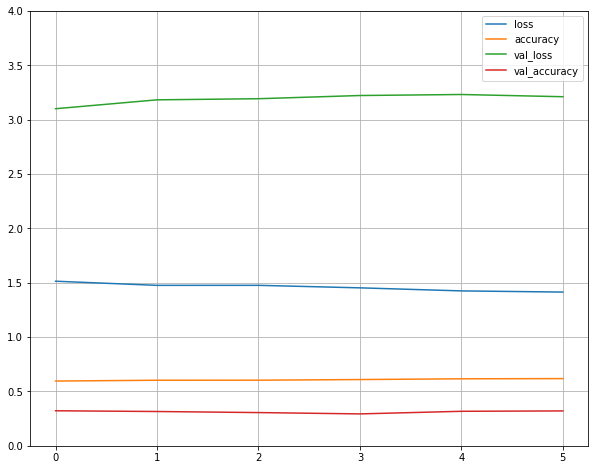

In [56]:
pd.DataFrame(TranModel3hist.history).plot(figsize = (10,8))
plt.grid(True)
plt.gca().set_ylim(0,4)
plt.show()